In [62]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

be mindful of "-83.61155885,"

In [63]:
# grafana filtered (old sites removed)
df = pd.read_csv('Locations-grafana.csv')

df = df.dropna(subset=['Node ID'])
df = df[df['Node ID'].str.endswith('A')]

subset_df = pd.read_csv('Locations-HuronWatershed.csv')

# Step 2: Extract sensor IDs from subset_df
subset_sensor_ids = subset_df['Site ID'].tolist()  # Adjust 'sensor_id' based on your column name

# Step 3: Filter df to remove rows with sensor IDs present in subset_df
df = df[~df['Site ID'].isin(subset_sensor_ids)]

print(df.head())
print(df.tail())

df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print(len(df['lat']))
print(len(df['lon']))
df = df.dropna(subset=['lon', 'lat'])
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')




   Site ID                        Node ID  Distance from Node to Ground (mm)  \
0        0  007A,011A,005A,009A,072A,061A                                NaN   
1   111111                 049A,029A,012A                                NaN   
32  ARB031                           088A                            4598.40   
39  ARB047                           022A                            1780.00   
41  ARB049                           039A                            2254.25   

                                              Grafana  \
0                                                 NaN   
1                                                 NaN   
32  https://dash.digitalwaterlab.org:3000/d/g1awLT...   
39  https://dash.digitalwaterlab.org:3000/d/gx1dwo...   
41  https://dash.digitalwaterlab.org:3000/d/Vgdnt3...   

                      Site Name Date Deployed                     Project  \
0           Unknown - Lost Node           NaN                         NaN   
1   Postal - Being Shi

/Users/shinapatel/anaconda3/envs/geo_env/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [64]:
# grafana csv only
'''
This section will take the csv from airtable and make it into a geojson to use in the next chunk
'''
'''

# Read the CSV file

df = pd.read_csv('Locations-grafana.csv')

print(df.head())

df = df.dropna(subset=['Node ID'])
df = df[df['Node ID'].str.endswith('A')]

# Filter rows where 'Latitude, Longitude' is not empty and does not contain '?'
df = df[(df['Latitude, Longitude'].notna()) & (df['Latitude, Longitude'] != '?')]

# Split the column containing "lat lon" into separate latitude and longitude columns
print(len(df['Latitude, Longitude']))

df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(', ', expand=True)
# df[['lat', 'lon']] = df['Latitude, Longitude'].str.split(',', expand=True)
print(len(df['lat']))
print(len(df['lon']))
df = df.dropna(subset=['lon', 'lat'])
print(len(df['lat']))
print(len(df['lon']))
del df['Latitude, Longitude']

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
crs = {'init': 'epsg:4326'}  # assuming WGS84 coordinates
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs=crs)

# Convert to GeoJSON
output_geojson = 'Huron_sensors.geojson'
gdf.to_file(output_geojson, driver='GeoJSON')
'''


'\n\n# Read the CSV file\n\ndf = pd.read_csv(\'Locations-grafana.csv\')\n\nprint(df.head())\n\ndf = df.dropna(subset=[\'Node ID\'])\ndf = df[df[\'Node ID\'].str.endswith(\'A\')]\n\n# Filter rows where \'Latitude, Longitude\' is not empty and does not contain \'?\'\ndf = df[(df[\'Latitude, Longitude\'].notna()) & (df[\'Latitude, Longitude\'] != \'?\')]\n\n# Split the column containing "lat lon" into separate latitude and longitude columns\nprint(len(df[\'Latitude, Longitude\']))\n\ndf[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\', \', expand=True)\n# df[[\'lat\', \'lon\']] = df[\'Latitude, Longitude\'].str.split(\',\', expand=True)\nprint(len(df[\'lat\']))\nprint(len(df[\'lon\']))\ndf = df.dropna(subset=[\'lon\', \'lat\'])\nprint(len(df[\'lat\']))\nprint(len(df[\'lon\']))\ndel df[\'Latitude, Longitude\']\n\n# Create a GeoDataFrame\ngeometry = [Point(xy) for xy in zip(df[\'lon\'], df[\'lat\'])]\ncrs = {\'init\': \'epsg:4326\'}  # assuming WGS84 coordinates\ngdf = gpd.Geo

Text(152.2753347624341, 0.5, 'Latitude')

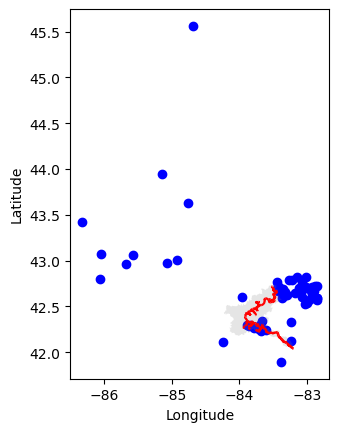

In [65]:
# Load GeoJSON files into GeoDataFrames
sensor_file = 'Huron_sensors.geojson'
river_file = 'Huron_RiverSystem.geojson'
watershed_file = "Huron_Watershed.geojson"

sensor = gpd.read_file(sensor_file)
river = gpd.read_file(river_file)
watershed = gpd.read_file(watershed_file)

# Plot GeoDataFrames on the same plot
ax = sensor.plot(color='blue', label='DWL @ UM sensors')
river.plot(ax=ax, color='red', label='Rivers')
watershed.plot(ax=ax, color='gray', label='Watershed', alpha = 0.2)

# Add legends and labels
# ax.legend()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')



In [66]:
df.to_csv('final_nodes.csv', index=False)
pd.set_option('display.max_rows', None)
print(df)

       Site ID Node ID  Distance from Node to Ground (mm)  \
32      ARB031    088A                            4598.40   
39      ARB047    022A                            1780.00   
41      ARB049    039A                            2254.25   
42      ARB050    087A                            1574.80   
48      ARB056    017A                            1917.70   
63      ARB071    106A                            2159.00   
79      ARB086    021A                            2146.30   
91      ARB098    118A                            2463.80   
92      ARB099    132A                            2322.40   
93      ARB100    108A                            5410.20   
94      ARB101    001A                            1930.40   
95      ARB102    060A                            1955.80   
96      ARB103    010A                            1587.50   
100     BIO001    133A                            1520.00   
102     DET001    024A                            5000.00   
103     DET004    044A  